# 美国职位市场数据分析总结

本报告基于LinkedIn平台收集的美国地区职位数据，采用统计学方法对数据进行全面分析。

**数据概览：**
- 总记录数：4,579条职位记录
- 涉及公司：2,262家不同公司
- 数据来源：LinkedIn平台
- 数据完整度：97.3%



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
sns.set_style("whitegrid")
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        pass

# 读取数据
file_path = r"C:\Users\Dylan\Desktop\US Full Report.xlsx"
df = pd.read_excel(file_path)

print(f"数据加载完成：{len(df)} 条记录，{len(df.columns)} 个字段")
df.head()



数据加载完成：4579 条记录，12 个字段


,职位名称,公司名称,专业要求,地点,薪资要求,年薪预估值,工作描述,公司规模,职位发布时间,职位状态,招聘平台,职位链接
0,Artificial Intelligence/Machine Learning (AI/M...,GliaCell Technologies,. Please do not apply if you currently do not ...,"Annapolis Junction, MD","$170,000 - $210,000 (年薪)",$190000,An active or rein-statable TS/SCI with Polygra...,16.0,2025-11-05,Active,LinkedIn,https://www.linkedin.com/jobs/view/artificial-...
1,"Data Scientist, Product",Notion,You'll Need To Bring You have spent meaningful...,"New York, NY","$140,000 - $170,000 (年薪)",$155000,About Us Notion helps you build beautiful tool...,4870.0,2025-11-05,Active,LinkedIn,https://www.linkedin.com/jobs/view/data-scient...
2,AI Engineer,DeepScribe,to verify identity and eligibility to work in ...,San Francisco Bay Area,"$150,000 - $250,000 (年薪)",$200000,About DeepScribe DeepScribe is building AI age...,105.0,2025-11-11,Active,LinkedIn,https://www.linkedin.com/jobs/view/ai-engineer...
3,Data Scientist Intern (Immediate Start),Fizz,Proficiency in SQL (understanding of data quer...,"New York, NY","$4,000.00 (月薪)",$48000,It’s better to apply on Polymer: https://jobs....,29.0,2025-11-05,Active,LinkedIn,https://www.linkedin.com/jobs/view/data-scient...
4,"Data Scientist (L5) , Performance Marketing",Netflix,to influence stakeholders using clear insights...,United States,"$170,000.00 (年薪)",$170000,Netflix is one of the world's leading entertai...,17715.0,2025-11-07,Active,LinkedIn,https://www.linkedin.com/jobs/view/data-scient...


## 1. 职位分布特征

数据科学和人工智能相关职位占据市场主导地位。最常见的职位是数据科学家（Data Scientist），共出现215次，占比4.70%。职位名称的多样性很高，共有3,402种不同的职位名称，表明市场对相关技能的需求呈现多样化特征。



C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3485840207.py:17: UserWarning: Glyph 32844 (\N{CJK UNIFIED IDEOGRAPH-804C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3485840207.py:17: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3485840207.py:17: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3485840207.py:17: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3485840207.py:17: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3485840207.py:17: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B})

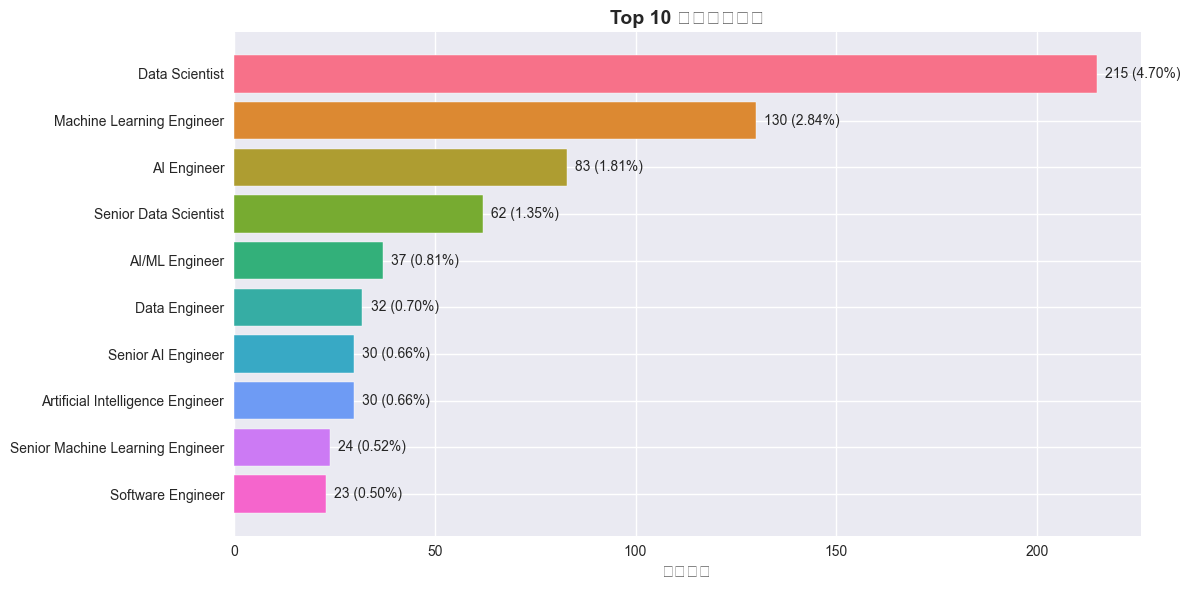

职位类型总数：3402 种
最常见的职位：Data Scientist (215 次)


In [2]:
# 职位分布分析
job_counts = df['职位名称'].value_counts().head(10)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(job_counts))
bars = plt.barh(range(len(job_counts)), job_counts.values, color=colors)
plt.yticks(range(len(job_counts)), job_counts.index)
plt.xlabel('职位数量', fontsize=12)
plt.title('Top 10 职位类型分布', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# 添加数值标签
for i, (idx, val) in enumerate(job_counts.items()):
    plt.text(val + 2, i, f'{val} ({val/len(df)*100:.2f}%)', 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"职位类型总数：{df['职位名称'].nunique()} 种")
print(f"最常见的职位：{job_counts.index[0]} ({job_counts.iloc[0]} 次)")



## 2. 公司分布特征

数据涉及2,262家不同的公司，职位发布相对分散。排名第一的公司HII仅占总职位数的2.51%，没有出现明显的垄断现象，体现了市场的竞争性。



C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2795123233.py:17: UserWarning: Glyph 32844 (\N{CJK UNIFIED IDEOGRAPH-804C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2795123233.py:17: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2795123233.py:17: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2795123233.py:17: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2795123233.py:17: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2795123233.py:17: UserWarning: Glyph 21496 (\N{CJK UNIFIED IDEOGRAPH-53F8})

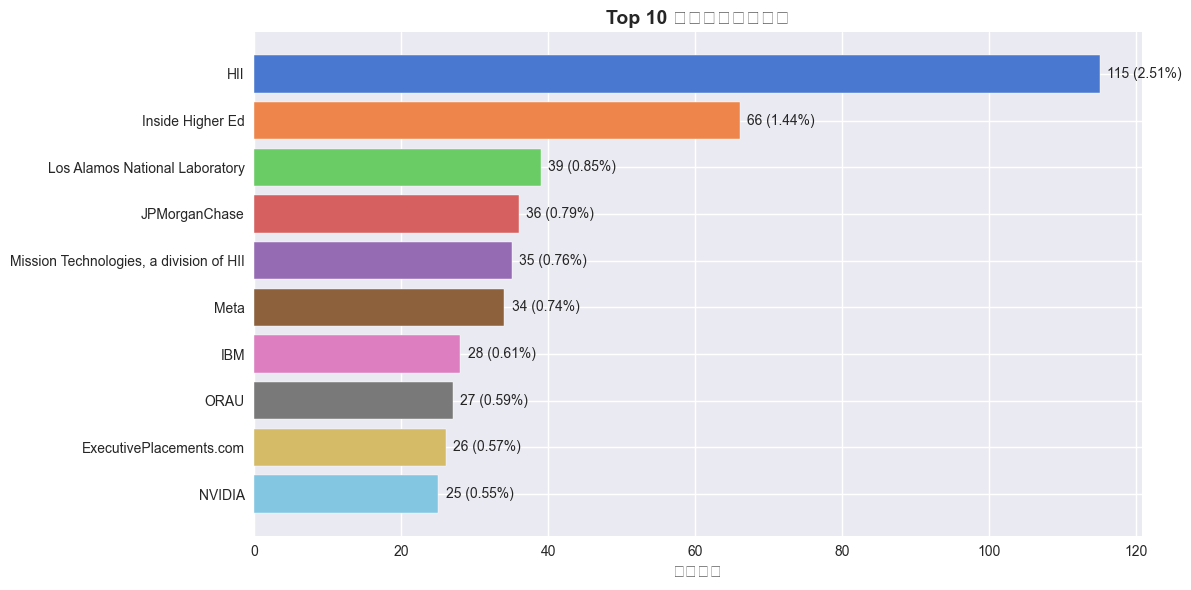

公司总数：2262 家
发布职位最多的公司：HII (115 个职位)


In [3]:
# 公司分布分析
company_counts = df['公司名称'].value_counts().head(10)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("muted", len(company_counts))
bars = plt.barh(range(len(company_counts)), company_counts.values, color=colors)
plt.yticks(range(len(company_counts)), company_counts.index)
plt.xlabel('职位数量', fontsize=12)
plt.title('Top 10 公司职位发布数量', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# 添加数值标签
for i, (idx, val) in enumerate(company_counts.items()):
    plt.text(val + 1, i, f'{val} ({val/len(df)*100:.2f}%)', 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"公司总数：{df['公司名称'].nunique()} 家")
print(f"发布职位最多的公司：{company_counts.index[0]} ({company_counts.iloc[0]} 个职位)")



## 3. 地理位置分布

职位分布覆盖847个不同的地理位置，但主要集中在科技产业发达的大城市，如纽约、旧金山、西雅图等，体现了科技人才需求的区域集中特征。



C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\1851163067.py:17: UserWarning: Glyph 32844 (\N{CJK UNIFIED IDEOGRAPH-804C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\1851163067.py:17: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\1851163067.py:17: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\1851163067.py:17: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\1851163067.py:17: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\1851163067.py:17: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406})

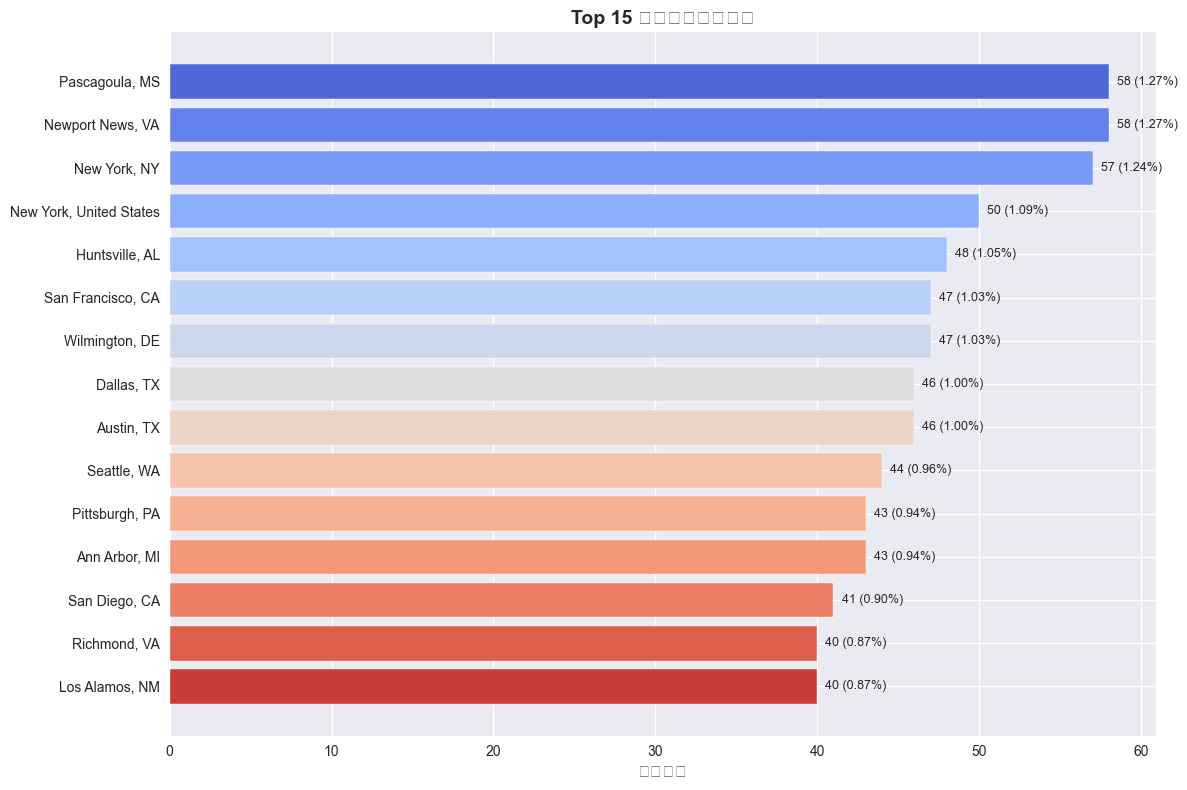

地理位置总数：847 个


In [4]:
# 地理位置分布分析
location_counts = df['地点'].value_counts().head(15)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(location_counts))
bars = plt.barh(range(len(location_counts)), location_counts.values, color=colors)
plt.yticks(range(len(location_counts)), location_counts.index)
plt.xlabel('职位数量', fontsize=12)
plt.title('Top 15 地理位置职位分布', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# 添加数值标签
for i, (idx, val) in enumerate(location_counts.items()):
    plt.text(val + 0.5, i, f'{val} ({val/len(df)*100:.2f}%)', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"地理位置总数：{df['地点'].nunique()} 个")



## 4. 公司规模分布

公司规模呈现出明显的右偏分布特征。平均值为10,667人，但中位数仅为1,251人，表明存在少数大型公司显著拉高了平均值。市场由大量中小型公司和少数大型公司组成。



C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\461865367.py:26: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\461865367.py:26: UserWarning: Glyph 21496 (\N{CJK UNIFIED IDEOGRAPH-53F8}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\461865367.py:26: UserWarning: Glyph 35268 (\N{CJK UNIFIED IDEOGRAPH-89C4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\461865367.py:26: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\461865367.py:26: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\461865367.py:26: UserWarning: Glyph 21592 (\N{CJK UNIFIED IDEOGRAPH-5458}) missi

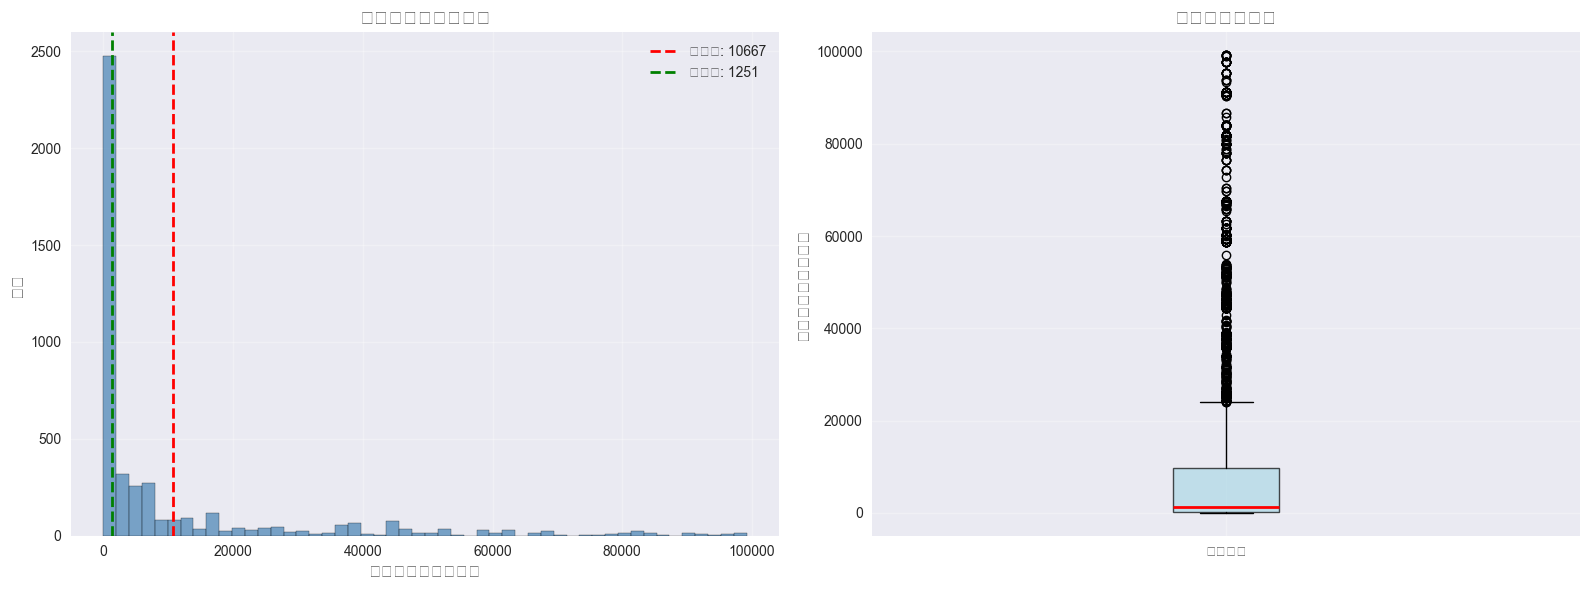

公司规模统计：
  平均值：10667 人
  中位数：1251 人
  标准差：19627 人
  最小值：1 人
  最大值：99186 人
  25%分位数：127 人
  75%分位数：9663 人


In [5]:
# 公司规模分析
company_size = df['公司规模'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 直方图
axes[0].hist(company_size, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(company_size.mean(), color='red', linestyle='--', linewidth=2, label=f'平均值: {company_size.mean():.0f}')
axes[0].axvline(company_size.median(), color='green', linestyle='--', linewidth=2, label=f'中位数: {company_size.median():.0f}')
axes[0].set_xlabel('公司规模（员工数）', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
axes[0].set_title('公司规模分布直方图', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 箱线图
box_data = [company_size]
axes[1].boxplot(box_data, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('公司规模（员工数）', fontsize=12)
axes[1].set_title('公司规模箱线图', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['公司规模'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"公司规模统计：")
print(f"  平均值：{company_size.mean():.0f} 人")
print(f"  中位数：{company_size.median():.0f} 人")
print(f"  标准差：{company_size.std():.0f} 人")
print(f"  最小值：{company_size.min():.0f} 人")
print(f"  最大值：{company_size.max():.0f} 人")
print(f"  25%分位数：{company_size.quantile(0.25):.0f} 人")
print(f"  75%分位数：{company_size.quantile(0.75):.0f} 人")



## 5. 薪资水平分析

年薪中位数为132,300美元，75%的职位年薪在165,500美元以下，显示出相对较高的薪资水平，符合数据科学和人工智能领域的市场定位。薪资水平存在较大波动，变异系数为0.49。



C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3728253308.py:47: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3728253308.py:47: UserWarning: Glyph 34218 (\N{CJK UNIFIED IDEOGRAPH-85AA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3728253308.py:47: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3728253308.py:47: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3728253308.py:47: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3728253308.py:47: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}

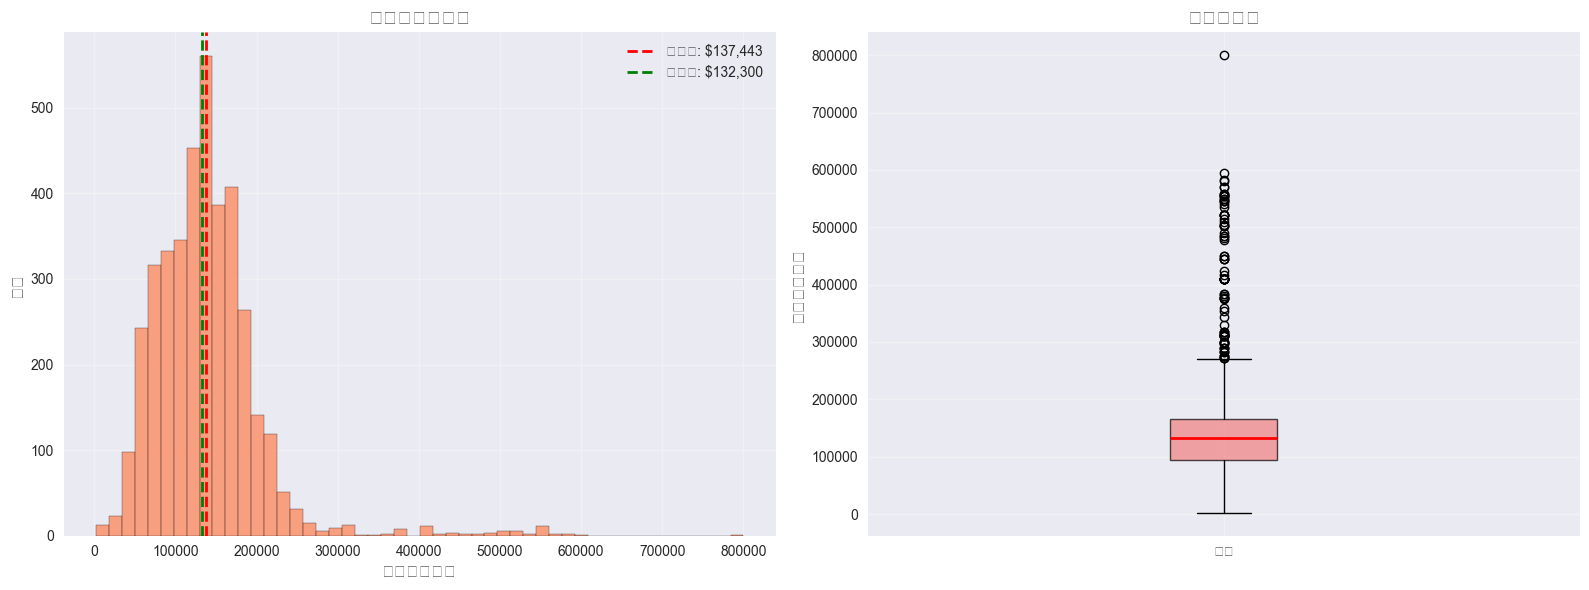

薪资统计：
  平均值：$137,443
  中位数：$132,300
  标准差：$67,291
  25%分位数：$95,000
  75%分位数：$165,500
  变异系数：0.49


In [6]:
# 薪资分析
def extract_salary_value(salary_str):
    if pd.isna(salary_str) or not isinstance(salary_str, str):
        return None
    numbers = re.findall(r'\d+', salary_str.replace(',', ''))
    if numbers:
        return float(numbers[0])
    return None

salary_estimates = df['年薪预估值'].dropna()
salary_values = []
for val in salary_estimates:
    if isinstance(val, (int, float)):
        salary_values.append(float(val))
    elif isinstance(val, str):
        extracted = extract_salary_value(val)
        if extracted:
            salary_values.append(extracted)

if salary_values:
    salary_series = pd.Series(salary_values)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 直方图
    axes[0].hist(salary_series, bins=50, color='coral', edgecolor='black', alpha=0.7)
    axes[0].axvline(salary_series.mean(), color='red', linestyle='--', linewidth=2, 
                     label=f'平均值: ${salary_series.mean():,.0f}')
    axes[0].axvline(salary_series.median(), color='green', linestyle='--', linewidth=2, 
                     label=f'中位数: ${salary_series.median():,.0f}')
    axes[0].set_xlabel('年薪（美元）', fontsize=12)
    axes[0].set_ylabel('频数', fontsize=12)
    axes[0].set_title('年薪分布直方图', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # 箱线图
    box_data = [salary_series]
    axes[1].boxplot(box_data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_ylabel('年薪（美元）', fontsize=12)
    axes[1].set_title('年薪箱线图', fontsize=14, fontweight='bold')
    axes[1].set_xticklabels(['年薪'])
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"薪资统计：")
    print(f"  平均值：${salary_series.mean():,.0f}")
    print(f"  中位数：${salary_series.median():,.0f}")
    print(f"  标准差：${salary_series.std():,.0f}")
    print(f"  25%分位数：${salary_series.quantile(0.25):,.0f}")
    print(f"  75%分位数：${salary_series.quantile(0.75):,.0f}")
    print(f"  变异系数：{salary_series.std()/salary_series.mean():.2f}")



## 6. 职位发布时间趋势

数据时间跨度约为962天（从2023年3月29日到2025年11月15日），平均每天发布约4.8个职位。最近几天职位发布数量明显增加，表明市场活跃度较高。



C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3907878238.py:34: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3907878238.py:34: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3907878238.py:34: UserWarning: Glyph 32844 (\N{CJK UNIFIED IDEOGRAPH-804C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3907878238.py:34: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3907878238.py:34: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\3907878238.py:34: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF})

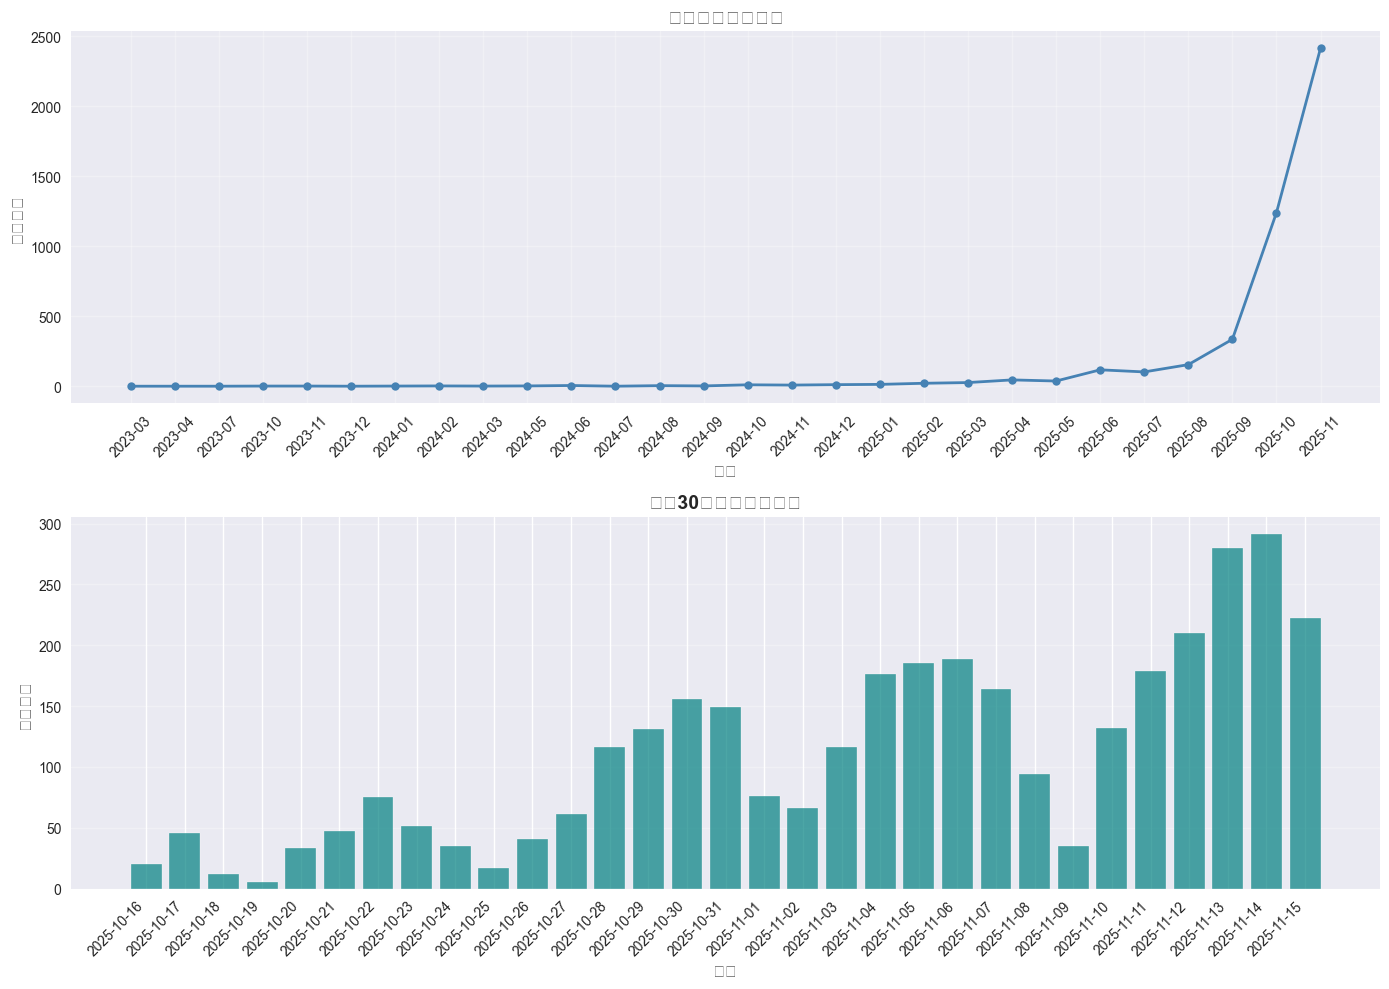

时间跨度：2023年03月29日 到 2025年11月15日
总天数：962 天
平均每天发布：4.8 个职位


In [7]:
# 职位发布时间分析
try:
    date_col = '职位发布时间'
    if date_col in df.columns:
        date_series = pd.to_datetime(df[date_col], errors='coerce').dropna()
        
        if len(date_series) > 0:
            # 按月份统计
            monthly_counts = date_series.dt.to_period('M').value_counts().sort_index()
            
            fig, axes = plt.subplots(2, 1, figsize=(14, 10))
            
            # 月度趋势图
            axes[0].plot(monthly_counts.index.astype(str), monthly_counts.values, 
                        marker='o', linewidth=2, markersize=6, color='steelblue')
            axes[0].set_xlabel('月份', fontsize=12)
            axes[0].set_ylabel('职位数量', fontsize=12)
            axes[0].set_title('职位发布月度趋势', fontsize=14, fontweight='bold')
            axes[0].grid(True, alpha=0.3)
            axes[0].tick_params(axis='x', rotation=45)
            
            # 最近30天的分布
            recent_dates = date_series[date_series >= date_series.max() - pd.Timedelta(days=30)]
            daily_counts = recent_dates.dt.date.value_counts().sort_index()
            
            axes[1].bar(range(len(daily_counts)), daily_counts.values, color='teal', alpha=0.7)
            axes[1].set_xticks(range(len(daily_counts)))
            axes[1].set_xticklabels([str(d) for d in daily_counts.index], rotation=45, ha='right')
            axes[1].set_xlabel('日期', fontsize=12)
            axes[1].set_ylabel('职位数量', fontsize=12)
            axes[1].set_title('最近30天职位发布分布', fontsize=14, fontweight='bold')
            axes[1].grid(True, alpha=0.3, axis='y')
            
            plt.tight_layout()
            plt.show()
            
            print(f"时间跨度：{date_series.min().strftime('%Y年%m月%d日')} 到 {date_series.max().strftime('%Y年%m月%d日')}")
            print(f"总天数：{(date_series.max() - date_series.min()).days} 天")
            print(f"平均每天发布：{len(date_series)/(date_series.max() - date_series.min()).days:.1f} 个职位")
except Exception as e:
    print(f"日期分析出错：{e}")



## 7. 数据质量评估

整体数据完整度达到97.3%，表明数据质量较高。缺失数据主要集中在薪资相关字段，其中薪资要求字段缺失688条记录，占总数的15.0%。



C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2617524683.py:29: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2617524683.py:29: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2617524683.py:29: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2617524683.py:29: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2617524683.py:29: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dylan\AppData\Local\Temp\ipykernel_29784\2617524683.py:29: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74})

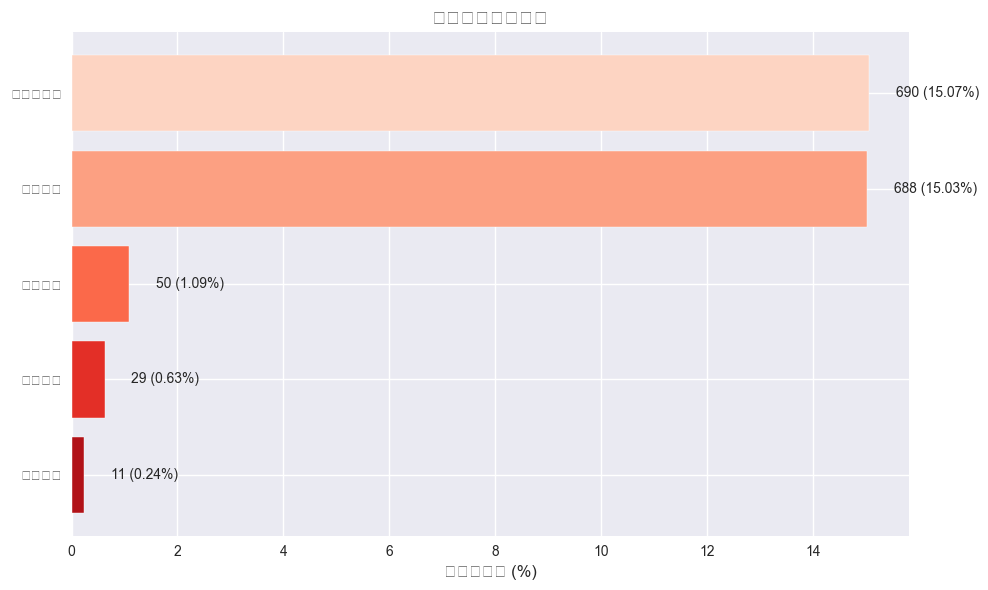

数据完整度：97.3%
缺失数据占比：2.7%


In [8]:
# 数据质量分析
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    '字段': missing_data.index,
    '缺失数量': missing_data.values,
    '缺失百分比': missing_percent.values
}).sort_values('缺失数量', ascending=False)

# 只显示有缺失值的字段
missing_df = missing_df[missing_df['缺失数量'] > 0]

if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = sns.color_palette("Reds", len(missing_df))
    bars = ax.barh(range(len(missing_df)), missing_df['缺失百分比'].values, color=colors)
    ax.set_yticks(range(len(missing_df)))
    ax.set_yticklabels(missing_df['字段'].values)
    ax.set_xlabel('缺失百分比 (%)', fontsize=12)
    ax.set_title('数据缺失情况分析', fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    
    # 添加数值标签
    for i, (idx, row) in enumerate(missing_df.iterrows()):
        ax.text(row['缺失百分比'] + 0.5, i, 
                f"{row['缺失数量']} ({row['缺失百分比']}%)", 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    total_cells = len(df) * len(df.columns)
    missing_cells = df.isnull().sum().sum()
    completeness = ((total_cells - missing_cells) / total_cells * 100)
    
    print(f"数据完整度：{completeness:.1f}%")
    print(f"缺失数据占比：{100 - completeness:.1f}%")
else:
    print("数据完整，无缺失值")



## 主要发现总结

1. **职位集中度**：数据科学和人工智能相关职位占据市场主导地位，职位名称的高度多样性反映了市场对相关技能需求的细化和专业化趋势。

2. **公司分布**：市场参与者众多，共涉及2,262家公司，但职位发布相对分散，没有出现明显的垄断现象，体现了市场的竞争性。

3. **地理分布**：职位分布覆盖847个不同地理位置，但主要集中在科技产业发达的大城市，体现了科技人才需求的区域集中特征。

4. **公司规模**：市场由大量中小型公司和少数大型公司组成，公司规模呈现明显的右偏分布。中位数仅为1,251人，而平均值达到10,667人。

5. **薪资水平**：年薪中位数为132,300美元，75%的职位年薪在165,500美元以下，显示出相对较高的薪资水平，符合数据科学和人工智能领域的市场定位。

6. **数据质量**：整体数据完整度达到97.3%，表明数据质量较高。但薪资信息存在一定缺失（约15%），这可能与部分公司未公开薪资信息有关。

